In [1]:
import numpy as np
import os
import datetime
import pandas as pd
import random
# from tqdm import tqdm
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn import preprocessing
from sklearn import datasets

In [19]:
from sklearn import model_selection
from sklearn import pipeline
from sklearn import linear_model
from sklearn import dummy
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster

In [6]:
import seaborn as sns

### Cross Validating
- Make a pipeline to preprocess, train and evaluate using cross validation
- Can use StratifiedKFold to ensure the same proportion of classes between folds
- When preprocessing data, use the training as the basis and that scaler for both training and test: https://betatim.github.io/posts/cross-validation-gone-wrong/

In [3]:
# Make Digits
digits = datasets.load_digits()
features = digits.data
target = digits.target

In [4]:
# Create Objects for Pipeline
standardizer = preprocessing.StandardScaler()
logit = linear_model.LogisticRegression()
my_pipeline = pipeline.make_pipeline(standardizer, logit)

In [5]:
# Cross Validation and conduct results
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
# Conduct K-fold cross validation, using all CPU with scoring as metric
cv_results = model_selection.cross_val_score(my_pipeline, features, target, cv=kf, scoring='accuracy', n_jobs=-1)

In [6]:
cv_results.mean()

0.964931719428926

In [7]:
# Example single evaluation
features_train, features_test, target_train, target_test = model_selection.train_test_split(features, target, test_size=0.1,
                                                                                           random_state=1)
# Fit Standardizer to train
standardizer.fit(features_train)
# Apply fitted to test and train
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

### Baseline Regression Model
- dummy model that uses mean, median, or other constant as a baseline for comparison against later models

In [8]:
# load data and split
boston = datasets.load_boston()
features = boston.data
target = boston.target
features_train, features_test, target_train, target_test = model_selection.train_test_split(features, target,
                                                                                            random_state=0)

In [9]:
# Dummy Regressor
dummy_reg = dummy.DummyRegressor(strategy='mean')
# Train Dummy
dummy_reg.fit(features_train, target_train)
dummy_reg.score(features_test, target_test)

-0.001119359203955339

In [10]:
# Make own model and compare
ols = linear_model.LinearRegression()
ols.fit(features_train, target_train)
# Get score
ols.score(features_test, target_test)

0.6354638433202129

R-Squared: closer to 1 the more of the variance in the target vector is explained by the features
- Calculation: 1 - sum(Actual - predicted)^2 / sum(Actual - mean)^2

### Baseline Classification
- stratified based on class distribution, uniform even class geusses

In [11]:
# load data and split
iris = datasets.load_iris()
features = iris.data
target = iris.target
features_train, features_test, target_train, target_test = model_selection.train_test_split(features, target,
                                                                                            random_state=0)

In [12]:
# Dummy Classifier
dummy_cl = dummy.DummyClassifier(strategy='uniform', random_state=1)
# Train Dummy
dummy_cl.fit(features_train, target_train)
dummy_cl.score(features_test, target_test)

0.42105263157894735

In [14]:
# Compare against forest
clf = ensemble.RandomForestClassifier()
clf.fit(features_train, target_train)
clf.score(features_test, target_test)

C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9736842105263158

### Classification Metrics & Quality
- Precision: how many predicted positves are positive?  TP / (TP + FP)
- Recall: how many positives did I predict?  TP / (TP + FN)
- F1 Score: Harmonic mean of Precision and Recall:  2 x (Precision * Recall) / (Precision + Recall)

In [15]:
# Create Data
features, target = datasets.make_classification(n_samples=10000, n_features=10, n_classes=2,
                                                n_informative=3, random_state=3)
# Split
features_train, features_test, target_train, target_test = model_selection.train_test_split(features, target, test_size=0.1,
                                                                                            random_state=0)

In [16]:
# Classifier
logit = linear_model.LogisticRegression()
logit.fit(features_train, target_train)
pred_prob = logit.predict_proba(features_test)[:, 1]
print(logit.classes_)

[0 1]


C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
# get metric rates for plotting
FP_rate, TP_rate, thresh = metrics.roc_curve(target_test, pred_prob)

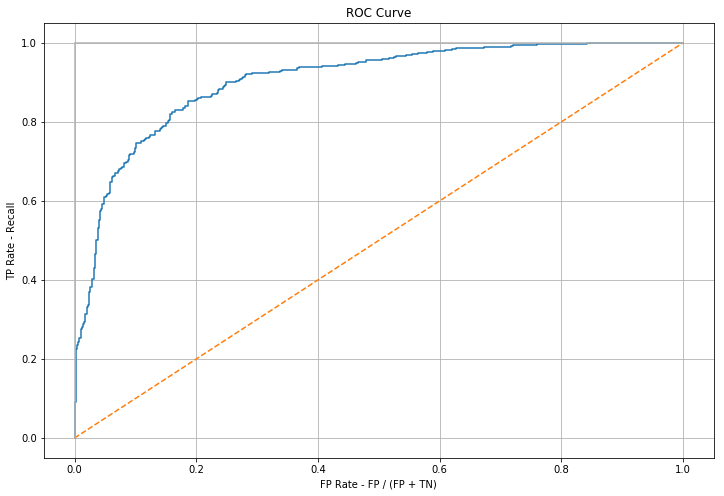

In [22]:
plt.figure(figsize=(12, 8))
plt.title("ROC Curve")
plt.plot(FP_rate, TP_rate)
plt.plot((0, 1), ls='--')
plt.plot((0, 0), (1, 0), c='.7')
plt.plot((1, 1), c='.7')
plt.xlabel("FP Rate - FP / (FP + TN)")
plt.ylabel('TP Rate - Recall')
plt.grid()
plt.show()

In [21]:
metrics.roc_auc_score(target_test, pred_prob)

0.904183616734467

### Multi-Class Classifiers

In [3]:
# Create Data
features, target = datasets.make_classification(n_samples=10000, n_features=3, n_classes=3, n_redundant=0,
                                                n_informative=3, random_state=1)
logit = linear_model.LogisticRegression()
model_selection.cross_val_score(logit, features, target, scoring='accuracy')

C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jenn\Anac

array([0.83653269, 0.8259826 , 0.81308131])

In [4]:
# Split
features_train, features_test, target_train, target_test = model_selection.train_test_split(features, target, test_size=0.1,
                                                                                            random_state=0)

In [5]:
# Cross Validate with macro averaged F1 Score
model_selection.cross_val_score(logit, features, target, scoring='f1_macro')

C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jenn\Anac

array([0.83613125, 0.82562258, 0.81293539])

### Visualize Classifier's Performance

In [7]:
# load data and split
iris = datasets.load_iris()
features = iris.data
target = iris.target
c_names = iris.target_names
features_train, features_test, target_train, target_test = model_selection.train_test_split(features, target,
                                                                                            random_state=1)

In [9]:
# Train
clf = linear_model.LogisticRegression()
target_pred = clf.fit(features_train, target_train).predict(features_test)
# Confusion Matrix
cf_matrix = metrics.confusion_matrix(target_test, target_pred)
df = pd.DataFrame(cf_matrix, columns=c_names, index=c_names)

C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


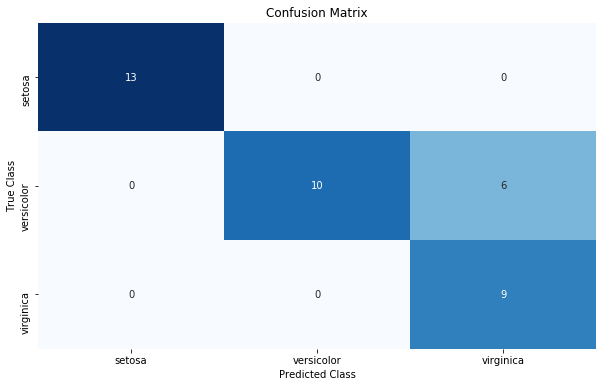

In [12]:
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cbar=None, cmap='Blues')
plt.title("Confusion Matrix")
#plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

### Evaluating Regression Models
- Mean Square Error: penalizes a few large errors
- R squared: amount of variance explained by the target vector

In [14]:
features, target = datasets.make_regression(n_samples=100, n_features=3, n_informative=3, n_targets=1, noise=50,
                                           coef=False, random_state=1)
ols = linear_model.LinearRegression()

In [16]:
cv_score = model_selection.cross_val_score(ols, features, target, scoring='neg_mean_squared_error')
cv_score

C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([-1718.22817783, -3103.4124284 , -1377.17858823])

In [18]:
model_selection.cross_val_score(ols, features, target, scoring='r2')

C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.87804558, 0.76395862, 0.89154377])

### Evaluate Clustering
- Silhouette coefficient: 
- mean silhouette coefficient for all obervations: (b - a) / max(a, b)
- a: mean distance between i and all observations of the samee class
- b: mean distance between i and all observations from the closest cluster of a different class

In [20]:
features, _ = datasets.make_blobs(n_samples=1000, n_features=10, centers=2, cluster_std=0.5, shuffle=True, random_state=1)
mod = cluster.KMeans(n_clusters=2, random_state=1).fit(features)
targ_pred = mod.labels_

In [22]:
metrics.silhouette_score(features, targ_pred)

0.8916265564072142

### Custom Scorer

In [23]:
features, target = datasets.make_regression(n_samples=100, n_features=3, random_state=1)
features_train, features_test, target_train, target_test = model_selection.train_test_split(features, target, test_size=0.1,
                                                                                           random_state=1)

In [24]:
# Custom Metric
def my_metric(target_vals, predicted_vals):
    r2 = metrics.r2_score(target_vals, predicted_vals)
    return r2

my_score = metrics.make_scorer(my_metric, greater_is_better=True)

In [25]:
clf = linear_model.Ridge()
my_model = clf.fit(features_train, target_train)

In [26]:
my_score(my_model, features_test, target_test)

0.9997906102882058

### Visualize Effect of Training size

In [28]:
# Make Digits
digits = datasets.load_digits()
features = digits.data
target = digits.target

In [29]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(ensemble.RandomForestClassifier(), features,
                                                                       target, cv=10, scoring='accuracy', n_jobs=-1,
                                                                       train_sizes=np.linspace(0.01, 1.0, 50))

In [32]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

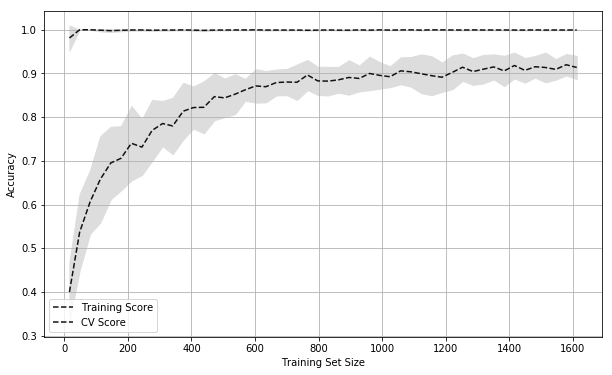

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, '--', color='#111111', label="Training Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.plot(train_sizes, test_mean, '--', color='#111111', label="CV Score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.xlabel("Training Set Size")
plt.show()

### Text Report

In [42]:
# load data and split
iris = datasets.load_iris()
features = iris.data
target = iris.target
c_names = iris.target_names
features_train, features_test, target_train, target_test = model_selection.train_test_split(features, target,
                                                                                            random_state=1)

In [43]:
clf = linear_model.LogisticRegression()
mod = clf.fit(features_train, target_train)
targ_pred = mod.predict(features_test)

C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jenn\Anaconda3\envs\everyday\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [44]:
print(metrics.classification_report(target_test, targ_pred, target_names=c_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.62      0.77        16
   virginica       0.60      1.00      0.75         9

   micro avg       0.84      0.84      0.84        38
   macro avg       0.87      0.88      0.84        38
weighted avg       0.91      0.84      0.84        38



### Visualize Effect of HyperParameters

In [45]:
# Make Digits
digits = datasets.load_digits()
features = digits.data
target = digits.target
param_range = np.arange(1, 250, 2)

In [47]:
train_scores, test_scores = model_selection.validation_curve(ensemble.RandomForestClassifier(), features, target,
                                                            param_name='n_estimators', param_range=param_range,
                                                            cv=3, scoring='accuracy', n_jobs=-1)

In [48]:
# Mean Accuracy for training and test set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

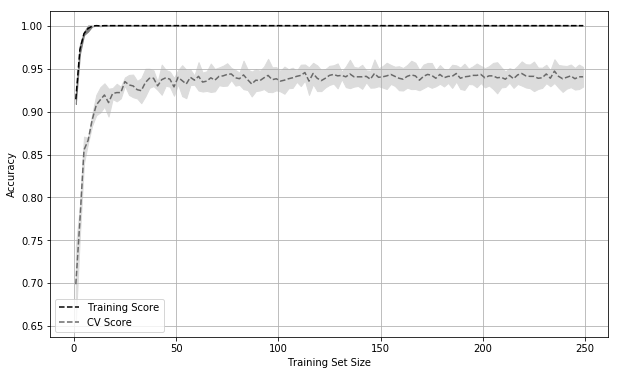

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, '--', color='black', label="Training Score")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color='gray')
plt.plot(param_range, test_mean, '--', color='dimgrey', label="CV Score")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color='gainsboro')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.xlabel("Training Set Size")
plt.show()